# PARTIAL EXAM

## Upoad the code

In [1]:
!ls

Scene-Recognition-with-Bag-of-Words env
Scene_Recognition.ipynb             requirements.txt


## Run the code

In [2]:
%cd Scene-Recognition-with-Bag-of-Words/code

/Users/joelibaceta/Projects/examen-parcial-computer-vision/Scene-Recognition-with-Bag-of-Words/code


In [3]:
!ls

README.md                    svm_classify.py
__pycache__                  test_image_feats.pkl
build_vocabulary.py          test_image_feats_1.pkl
get_bags_of_sifts.py         train_image_feats.pkl
get_image_paths.py           train_image_feats_1.pkl
get_tiny_images.py           visualize.py
nearest_neighbor_classify.py visulizatoin.md
plot.png                     vocab.pkl
proj3.py


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

### Nota Importante
El código original usa `cyvlfeat` que no es compatible con macOS ARM. Se ha reemplazado con **OpenCV SIFT** mediante el archivo `cv2_sift_utils.py` que proporciona las mismas funcionalidades.

Las dependencias ya están instaladas:
- ✅ OpenCV (con SIFT)
- ✅ scikit-learn (para KMeans)
- ✅ scipy (para cálculos de distancias)
- ✅ scikit-image (funciones de imagen adicionales)

In [5]:
# Ejecutar con argumentos para ver resultados reales
# Opción 1: Tiny images con nearest neighbor (rápido para pruebas)
!python proj3.py --feature tiny_image --classifier nearest_neighbor

# Opción 2: Bag of SIFT con nearest neighbor (mejor precisión, más lento)
# !python proj3.py --feature bag_of_sift --classifier nearest_neighbor

# Opción 3: Bag of SIFT con SVM (mejor rendimiento, más lento)
# !python proj3.py --feature bag_of_sift --classifier support_vector_machine

Getting paths and labels for all train and test data
num_categories:  15
num_train_per_cat: 100
['../data/train/Kitchen/image_0146.jpg', '../data/train/Kitchen/image_0152.jpg', '../data/train/Kitchen/image_0185.jpg', '../data/train/Kitchen/image_0191.jpg', '../data/train/Kitchen/image_0032.jpg', '../data/train/Kitchen/image_0026.jpg', '../data/train/Kitchen/image_0153.jpg', '../data/train/Kitchen/image_0179.jpg', '../data/train/Kitchen/image_0151.jpg', '../data/train/Kitchen/image_0145.jpg', '../data/train/Kitchen/image_0186.jpg', '../data/train/Kitchen/image_0019.jpg', '../data/train/Kitchen/image_0025.jpg', '../data/train/Kitchen/image_0030.jpg', '../data/train/Kitchen/image_0187.jpg', '../data/train/Kitchen/image_0193.jpg', '../data/train/Kitchen/image_0144.jpg', '../data/train/Kitchen/image_0140.jpg', '../data/train/Kitchen/image_0020.jpg', '../data/train/Kitchen/image_0034.jpg', '../data/train/Kitchen/image_0196.jpg', '../data/train/Kitchen/image_0169.jpg', '../data/train/Kitchen/

### Alternativa: Ejecutar directamente en el notebook
Para ver las gráficas (matriz de confusión) directamente en el notebook, ejecuta la siguiente celda:

Getting paths and labels for all train and test data
num_categories:  15
num_train_per_cat: 100
['../data/train/Kitchen/image_0146.jpg', '../data/train/Kitchen/image_0152.jpg', '../data/train/Kitchen/image_0185.jpg', '../data/train/Kitchen/image_0191.jpg', '../data/train/Kitchen/image_0032.jpg', '../data/train/Kitchen/image_0026.jpg', '../data/train/Kitchen/image_0153.jpg', '../data/train/Kitchen/image_0179.jpg', '../data/train/Kitchen/image_0151.jpg', '../data/train/Kitchen/image_0145.jpg', '../data/train/Kitchen/image_0186.jpg', '../data/train/Kitchen/image_0019.jpg', '../data/train/Kitchen/image_0025.jpg', '../data/train/Kitchen/image_0030.jpg', '../data/train/Kitchen/image_0187.jpg', '../data/train/Kitchen/image_0193.jpg', '../data/train/Kitchen/image_0144.jpg', '../data/train/Kitchen/image_0140.jpg', '../data/train/Kitchen/image_0020.jpg', '../data/train/Kitchen/image_0034.jpg', '../data/train/Kitchen/image_0196.jpg', '../data/train/Kitchen/image_0169.jpg', '../data/train/Kitchen/

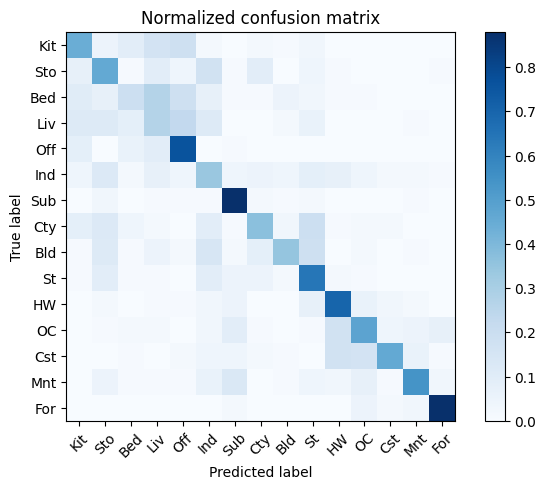

In [ ]:
import sys

# Configurar los argumentos para el script
# Cambiar estos valores para probar diferentes configuraciones:
# Features: 'tiny_image' o 'bag_of_sift'
# Classifiers: 'nearest_neighbor' o 'support_vector_machine'

sys.argv = ['proj3.py', '--feature', 'tiny_image', '--classifier', 'support_vector_machine']

# Ejecutar el script directamente
exec(open('proj3.py').read())

In [7]:
%cd ..

/Users/joelibaceta/Projects/examen-parcial-computer-vision/Scene-Recognition-with-Bag-of-Words
